In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import data 

In [31]:
df_southwest = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_southwest_clean.xlsx')

In [32]:
df_southwest = df_southwest.set_index(['date'])

In [33]:
X = df_southwest[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [34]:
y = df_southwest['pax_count'].values

## Train & test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Normalize the data

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

## Creating the model 

In [39]:
model = Sequential()

model.add(Dense(4, activation='relu', 
                kernel_initializer=initializers.RandomNormal(stddev=0.01),
                bias_initializer=initializers.Zeros()
               ))
model.add(Dense(8, activation='relu'))
#model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
#model.add(Dense(2, activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [40]:
opt = keras.optimizers.Adam(learning_rate=0.2, beta_1=0.5, beta_2=0.999)

model.compile(loss = 'mean_absolute_error', optimizer= opt)

## Fit the model 

In [41]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
6/6 [==============================] - 1s 49ms/step - loss: 9800532.0000 - val_loss: 9754484.0000
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 9793342.0000 - val_loss: 9693158.0000
Epoch 3/50
6/6 [==============================] - 0s 18ms/step - loss: 9571385.0000 - val_loss: 8724434.0000
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 7408246.5000 - val_loss: 2414672.5000
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 1011169.5625 - val_loss: 330457.8438
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 479991.7188 - val_loss: 390352.2500
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 405685.0625 - val_loss: 1176368.0000
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 742733.3125 - val_loss: 607542.7500
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 433158.1250 - val_loss: 306063.8125
Epoch 10/50
6/6 [==========

In [42]:
losses = pd.DataFrame(model.history.history)

In [43]:
losses.head()

,loss,val_loss
0,9.800532e+06,9.754484e+06
1,9.793342e+06,9.693158e+06
2,9.571385e+06,8.724434e+06
3,7.408246e+06,2.414672e+06
4,1.011170e+06,3.304578e+05


<AxesSubplot:>

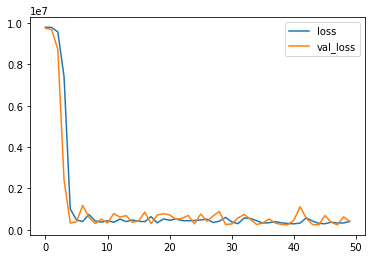

In [44]:
losses.plot()

In [45]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [46]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 5)                 45        
                                                                 
 dense_8 (Dense)             (None, 3)                 18        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Layer:  dense_5
  --Kernels (Weights):  [array([[ 1.0302

### Evaluation 

#### MAE and RMSE

In [47]:
MAE_train = (round(mean_absolute_error(y_train, trainPredict),2))
print("Train Score: %.2f MAE" % (MAE_train))

Train Score: 459582.36 MAE


In [48]:
MAE_test = (round(mean_absolute_error(y_test, testPredict),2))
print("Test Score: %.2f MAE" % (MAE_test))

Test Score: 404894.10 MAE


In [49]:
RMSE_train = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (RMSE_train))

Train Score: 516670.21 RMSE


In [50]:
RMSE_test = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (RMSE_test))

Test Score: 468000.82 RMSE


### MAPE 

In [51]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [52]:
round(MAPE(y_test, testPredict),2)

27.87

In [53]:
def plot_delta(actual, predictions):
    title = 'Passanger Predictions Store '
    act = plt.plot(actual, color='blue', label='Actual')
    pred = plt.plot(predictions, color='orange', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

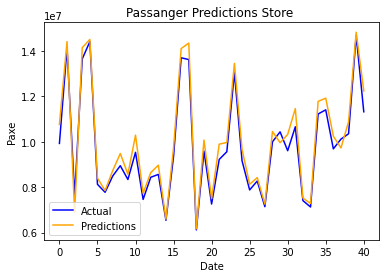

In [54]:
plot_delta(y_test, testPredict)

## Export Forecast

In [55]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest


In [56]:
testPredict.tofile('predictions_ffnn.csv')